## Data Science Model that predicts the price of a house based on its features

### 1. Problem definition

Can we find a model that explains how these factors affect the use housing prices

### 2. Data

The data was originally collected from https://fred.stlouisfed.org/series/CSUSHPISA%5D
The macroeconomic factors were collected from https://www.kaggle.com/datasets/faryarmemon/usa-housing-market-factors

### 3. Evaluation

### 4. Features
*the data dictionary*

Independent Variables
1. Date
2. Population
3. House supply
4. GDP
5. Morgage rate
6. employment rate
7. permit new
8. ppi res
9. m3
10. cci
11. delinquency rate
12. hcai

Dependent Vairables
1. House_price_index

In [23]:
# importing the EDA and ploting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load Data

In [5]:
df = pd.read_csv("Housing_Macroeconomic_Factors_US (2).csv")
df.head(5)

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.0,2.7439,100.4624,NaN,NaN
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.4,2.7475,100.4945,NaN,NaN
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.7,2.7537,100.5720,NaN,NaN
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.1,2.7677,100.6568,NaN,NaN
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.3,2.7729,100.6919,NaN,NaN


In [24]:
df.shape

(425, 13)

In [25]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               425 non-null    datetime64[ns]
 1   house_price_index  425 non-null    float64       
 2   population         425 non-null    int64         
 3   house_supply       425 non-null    float64       
 4   gdp                422 non-null    float64       
 5   mortgage_rate      422 non-null    float64       
 6   employment_rate    422 non-null    float64       
 7   permit_new         422 non-null    float64       
 8   ppi_res            422 non-null    float64       
 9   m3                 422 non-null    float64       
 10  cci                422 non-null    float64       
 11  delinquency_rate   374 non-null    float64       
 12  hcai               285 non-null    float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 43.3 KB

In [26]:
df.isnull().sum()

Date                   0
house_price_index      0
population             0
house_supply           0
gdp                    3
mortgage_rate          3
employment_rate        3
permit_new             3
ppi_res                3
m3                     3
cci                    3
delinquency_rate      51
hcai                 140
dtype: int64

Since gdp, mortgage rate, employment_rate, permit_new, ppi_res, m3, cci each have 3 missing values we will drop the missing values

In [27]:
# Check if the columns exist in the dataframe
columns_to_drop = ['gdp', 'mortgage_rate', 'employment_rate', 'permit_new', 'ppi_res', 'm3', 'cci']
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Drop rows with missing values in the existing columns
df = df.dropna(subset=existing_columns)

In [28]:
df.isna().sum()

Date                   0
house_price_index      0
population             0
house_supply           0
gdp                    0
mortgage_rate          0
employment_rate        0
permit_new             0
ppi_res                0
m3                     0
cci                    0
delinquency_rate      48
hcai                 137
dtype: int64

Dropping the rows deliquency rate and hcai would lead to loss of important data, we can either drop the columns or replace the missing values with the mean

In [29]:
# replacing missing values with the mean
df['delinquency_rate'] = df['delinquency_rate'].fillna(df['delinquency_rate'].mean())
df['hcai'] = df['hcai'].fillna(df['hcai'].mean())


In [30]:
df.isna().sum()

Date                 0
house_price_index    0
population           0
house_supply         0
gdp                  0
mortgage_rate        0
employment_rate      0
permit_new           0
ppi_res              0
m3                   0
cci                  0
delinquency_rate     0
hcai                 0
dtype: int64

In [31]:
df.describe()

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
count,422,422.000000,422.00000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,2004-07-16 12:40:56.872037888,134.713419,291697.63981,5.797867,99.955457,6.328301,70.759327,1346.962085,166.813685,7.666456,100.124667,3.984947,8.981895
min,1987-01-01 00:00:00,63.965000,241857.00000,3.300000,91.543057,2.684000,60.261014,513.000000,100.000000,2.743900,96.460330,1.400000,2.293000
25%,1995-10-08 18:00:00,81.517250,267646.00000,4.400000,99.559318,4.266250,69.317138,1077.250000,133.500000,3.615025,99.106098,2.160000,3.208000
50%,2004-07-16 12:00:00,139.230500,293476.50000,5.450000,99.977924,6.257250,71.221613,1362.000000,154.750000,6.297450,100.498000,2.840000,8.981895
75%,2013-04-23 12:00:00,174.215750,316680.50000,6.700000,100.556927,7.912000,72.281388,1614.750000,207.400000,10.617625,101.063150,3.984947,10.491000
max,2022-02-01 00:00:00,290.371000,332750.00000,12.200000,101.825852,11.260000,74.507436,2263.000000,303.546000,21.749700,102.977600,11.360000,21.774000
std,NaN,52.027280,28081.13867,1.685884,1.124453,2.209432,2.247253,394.776877,43.943882,4.656247,1.466327,2.741686,5.630835


### Performing EDA with the date column
`parse-date` parameter should be passed will loading the data

In [22]:
df = pd.read_csv("Housing_Macroeconomic_Factors_US (2).csv",
                 parse_dates=['Date'])

In [33]:
df.Date.dtype

dtype('<M8[ns]')

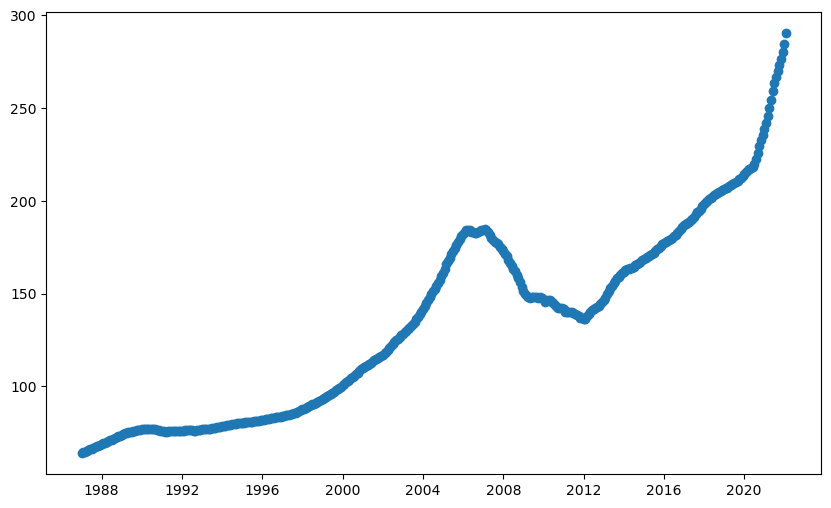

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Date'], df['house_price_index'])

In [38]:
df.head(5)

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.0,2.7439,100.4624,3.984947,8.981895
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.4,2.7475,100.4945,3.984947,8.981895
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.7,2.7537,100.5720,3.984947,8.981895
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.1,2.7677,100.6568,3.984947,8.981895
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.3,2.7729,100.6919,3.984947,8.981895
